# Final Project

For my final project, I chose a public dataset on UFO sightings, inspired by my fascination with UFOs after taking ASTR103: Alien Life in the Universe last Fall. In my analysis of the data I found evidence supporting my hypothesis that UFO sightings are heavily shaped by the portrayal of UFOs in the media and pop culture.  The dataset includes details on sightings from the 20th and 21st centuries, such as date, duration, location, shape, and comments. My first visualization is a map of UFO sightings worldwide, created using quick_map() and geom_point(). It shows that sightings are most prevalent in Europe and the USA, with far fewer in Africa, India, and China. This could be due to cultural emphasis on UFOs in the USA and Europe especially through sci-fi movies popular in Western cultures, or biases in data collection originating from the dataset's American roots.
The second visualization explores the shapes of UFOs, highlighting circles, triangles, and ovals as the most frequently reported. This aligns with popular depictions of UFOs in media, suggesting a strong influence of pop culture on how sightings are described. 
The next two visualizations explore UFO sightings over time and their durations. 
I first created a bar chart showing the number of UFO sightings per year, focusing on entries with valid date information. It shows an increase in UFO reports starting in the mid-20th century, likely driven by media coverage and public interest, although recency bias in data collection may also play a role. The next visualization examines the duration of sightings using a boxplot with a logarithmic y-axis to account for the skewed data. The majority of sightings lasted a few seconds, but there were significant outliers with durations of several minutes or longer. This shows how exceedingly rare it is for sightings to last long enough for the viewer to fully analyze and see the UFO. The last visualization focuses on UFO sightings within the United States, providing a closer look at regional density. To create this map, I filtered the dataset to include only sightings within the continental U.S., limiting latitude and longitude to the borders. Using a base map of the U.S. created with map_data("usa"), I layered the sightings on top with geom_point(). It unsurprisingly aligned sightings closely with population density, but also revealed interesting clusters, such as in Minneapolis and the Pacific Northwest. This analysis demonstrates that UFO sightings are heavily shaped by media depictions and cultural narratives, influencing both how and where people report these phenomena.






https://www.kaggle.com/datasets/NUFORC/ufo-sightings


**Due date: 06-December-2024**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

In [6]:
library('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr   1.1.4     ✔ readr   2.1.5
✔ forcats 1.0.0     ✔ stringr 1.5.1
✔ ggplot2 3.5.1     ✔ tibble  3.2.1
✔ purrr   1.0.2     ✔ tidyr   1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::map()    masks maps::map()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [7]:
ufos = read_csv('scrubbed.csv')
ufos |> head()

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 80332 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): datetime, city, state, country, shape, duration (hours/min), commen...
dbl (3): duration (seconds), latitude, longitude

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 1949-50. It occurred after a Boy Scout meeting in the Baptist Church. The Baptist Church sit,4/27/2004,29.88306,-97.941111
10/10/1949 21:00,lackland afb,tx,NA,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing across the sky &amp; making 90 degree turns on a dime.,12/16/2005,29.38421,-98.581082
10/10/1955 17:00,chester (uk/england),NA,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 England,1/21/2008,53.20000,-2.916667
10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving the only Edna theater at about 9 PM&#44...we had our bikes and I took a different route home,1/17/2004,28.97833,-96.645833
10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/attack aircraft on a solo night exercise&#44 I was at 50&#44000&#39 in a &quot;clean&quot; aircraft (no ordinan,1/22/2004,21.41806,-157.803611
10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl with us now 51 myself 49 and the other fellow which worked with my father if he&#39s still livi,4/27/2007,36.59500,-82.188889


Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


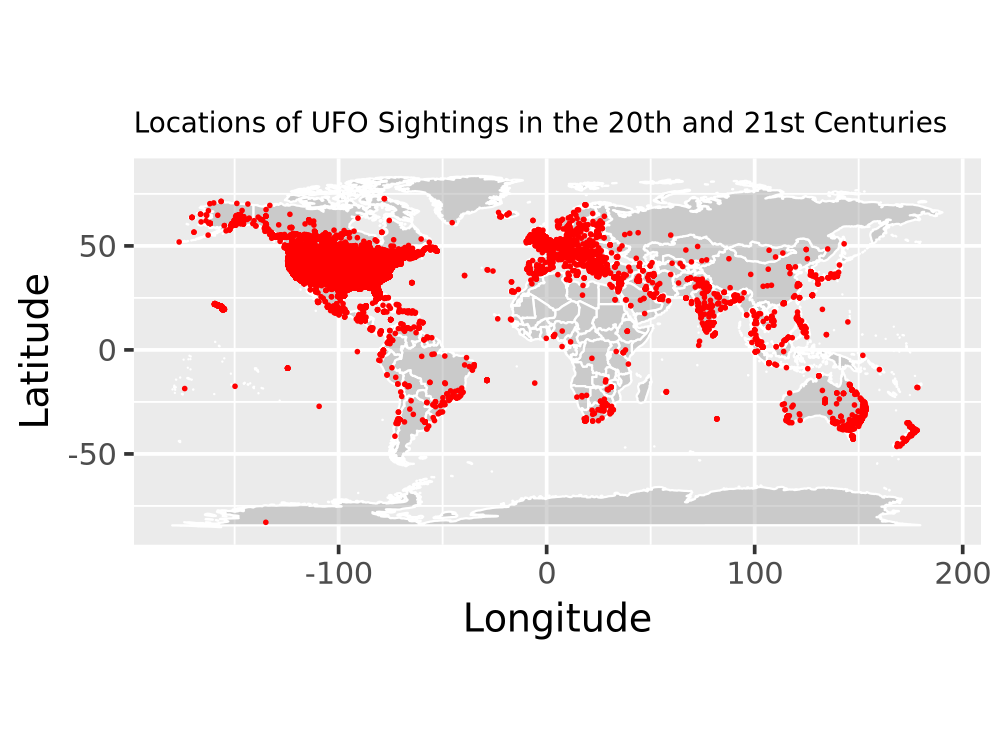

In [8]:
library(maps) #loading world map data
mapdat = map_data("world")
#mapping sightings on top of coordinate system
ufo_sightings_mapped = ggplot(data =  mapdat) + 
    geom_polygon(aes(x = long, y = lat, group = group), fill = 'darkgrey', color = "white", alpha = 0.5, linewidth = .3) + 
    coord_quickmap() + geom_point(data = ufos, aes(x = longitude, y = latitude), size = .1, color = "red") + labs(x = "Longitude",
                                                                                                                 y = "Latitude", title = "Locations of UFO Sightings in the 20th and 21st Centuries") + theme(plot.title = element_text(size=8))
ufo_sightings_mapped

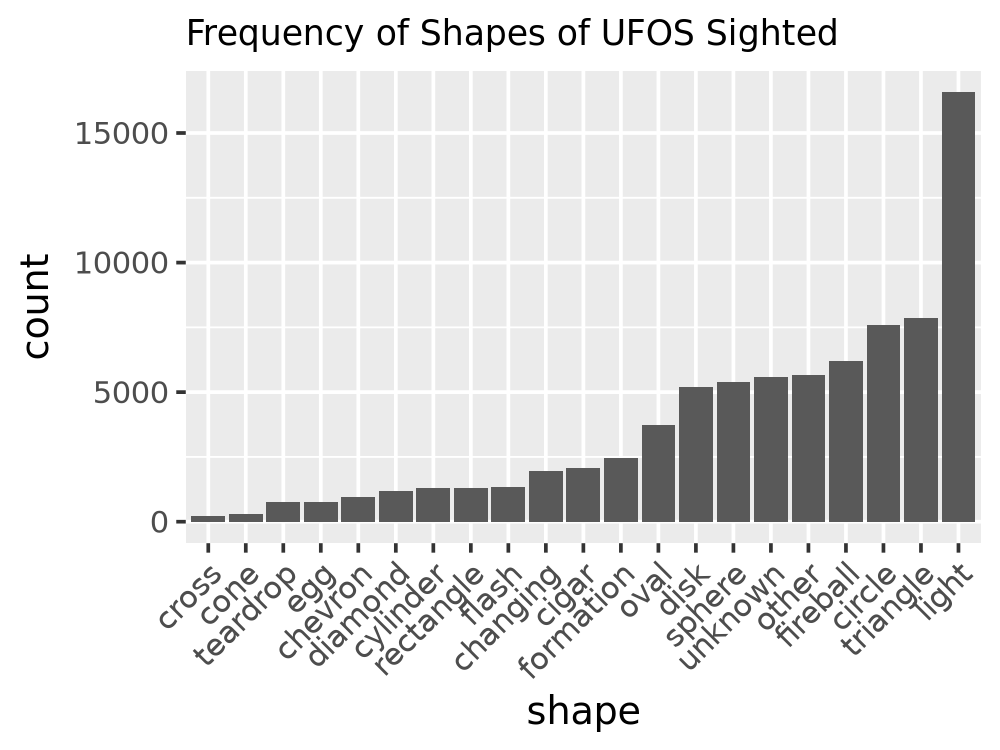

In [9]:
#generating bar chart of relative frequencies of shapes seen
ufos_no_na = filter(ufos, shape != "NA")
shape_counts = ufos_no_na |> group_by(shape) |> summarize(count = n()) |> ungroup()
shape_counts = shape_counts |> mutate(shape = fct_reorder(shape, count)) 
shape_counts = filter(shape_counts, count > 30)
shapes = ggplot(shape_counts, aes(x = shape, y = count)) + geom_col() + theme(
    axis.text.x = element_text(angle = 45, hjust = 1)) + labs(title = "Frequency of Shapes of UFOS Sighted") + theme(plot.title = element_text(size=10))
shapes

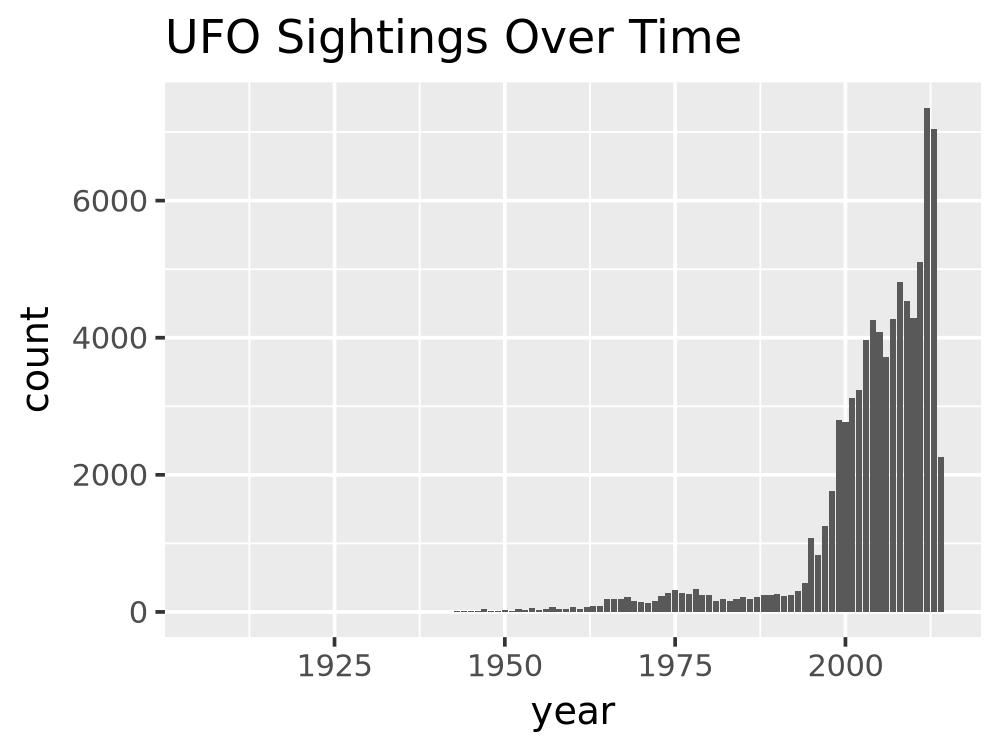

In [10]:
library('lubridate')

#generating bar chart of change in sightings over time
ufos = ufos |> mutate(date = mdy_hm(datetime))
ufos = mutate(ufos, year = year(date))
ufos_with_dates = filter(ufos, year != "NA")
r = ggplot(ufos_with_dates, aes(x = year)) + geom_bar() + labs(title = "UFO Sightings Over Time")
r





# A tibble: 1 × 3
  median    q1    q3
   <dbl> <dbl> <dbl>
1    180    30   600


Warning message:
“Removed 3 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


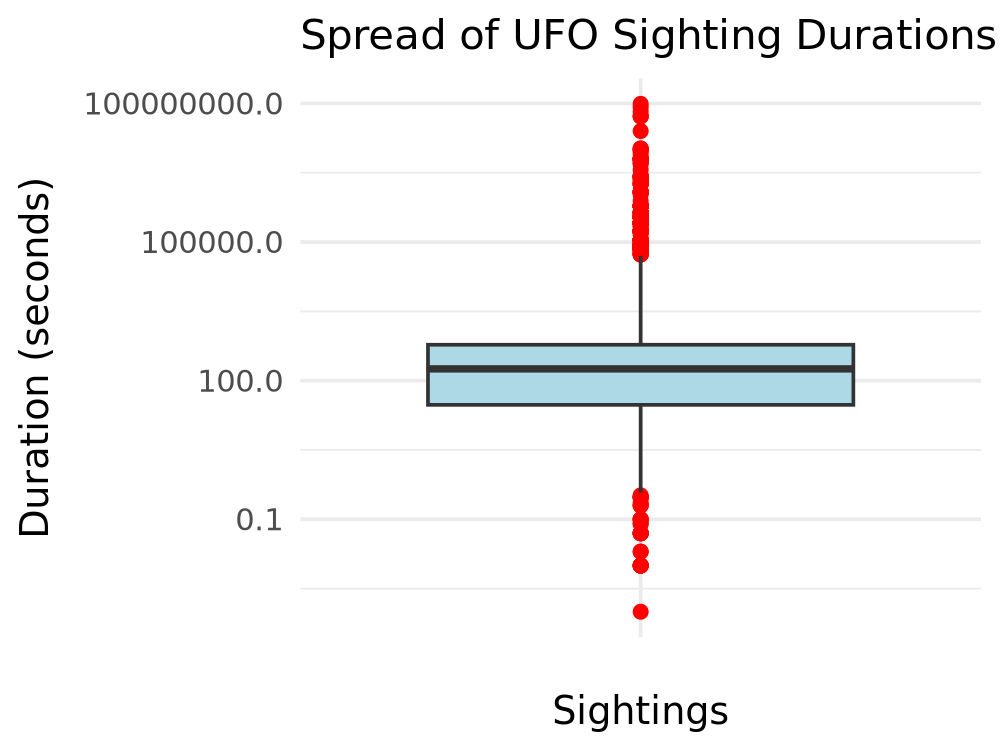

In [11]:
#displaying relevant stats- median and quartiles
summary_stats <- ufos %>%
  summarise(
    median = median(`duration (seconds)`, na.rm = TRUE),
    q1 = quantile(`duration (seconds)`, 0.25, na.rm = TRUE),
    q3 = quantile(`duration (seconds)`, 0.75, na.rm = TRUE)
  )
print(summary_stats)

ggplot(ufos, aes(x = "", y = `duration (seconds)`)) +
    geom_boxplot(outlier.color = "red", fill = "lightblue") +
    scale_y_log10(labels = function(x) format(x, scientific = FALSE)) +  # Disable scientific notation
    labs(title = "Spread of UFO Sighting Durations",
         x = "Sightings", 
         y = "Duration (seconds)") +
    theme_minimal() + theme(plot.title = element_text(size=12))

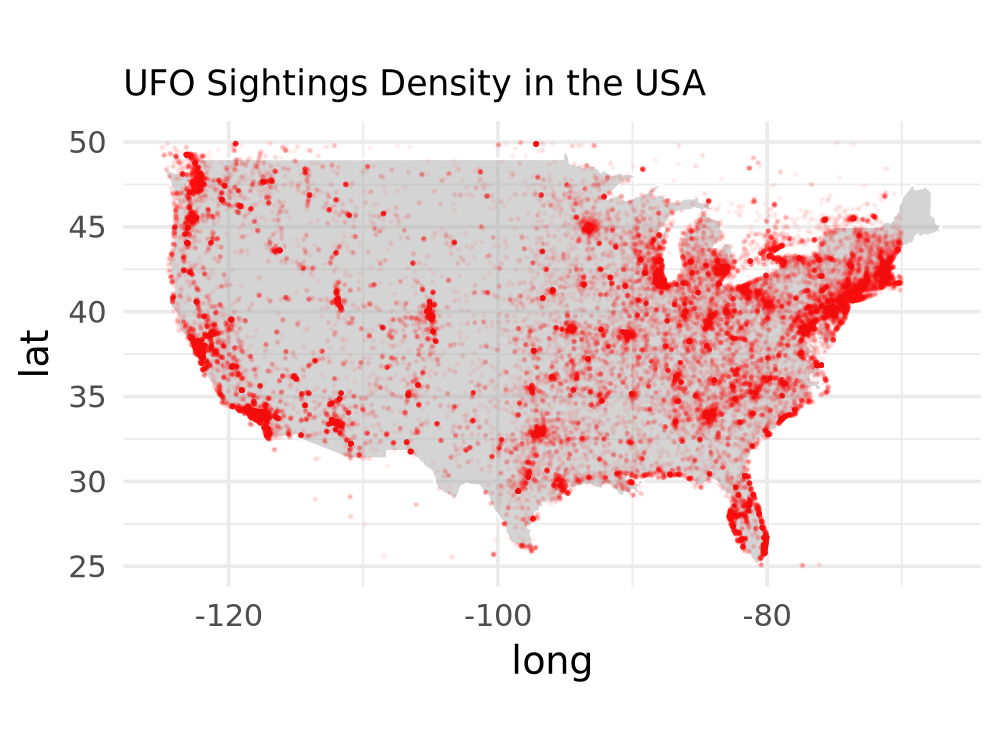

In [13]:


ufosinusa = filter(ufos, longitude > -125)
ufosinusa = filter(ufosinusa, longitude < -70)
ufosinusa = filter(ufosinusa, latitude > 25)
ufosinusa = filter(ufosinusa, latitude < 50)#filtering by coordinates of continental usa

america = map_data("usa") #generating usa map data

    #plotting sightings on top of usa map
usamapped_density = ggplot(data = america) +
    geom_polygon(aes(x = long, y = lat, group = group), fill = 'darkgrey', color = "white", alpha = 0.5, linewidth = .3) +
    coord_quickmap() +
    geom_point(data = ufosinusa, aes(x = longitude, y = latitude), alpha = 0.04, color = "red", size = .1) +
    labs(title = "UFO Sightings Density in the USA") +
    theme_minimal()+ theme(plot.title = element_text(size=10))

usamapped_density